In [36]:
## Install libraries
import pandas as pd
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
from sentence_transformers import SentenceTransformer

In [38]:
embedder = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

In [60]:
# create a list of sentences
texts = ['I have a checking account with this bank.', 'I applied for a car loan with this bank', 
         "I use the bank's mobile app to check my account balance", 'I have a credit card with this bank.', 
         "I received poor customer service from this bank.", "I had a problem with a transaction on my account.",
         "I am unhappy with the fees charged by this bank.", "I use this bank's online banking system regularly.", 
         "I have a savings account with this bank.", "I recently opened a new account with this bank.",
         "I have an issue with the bank's security measures","I've been using the bank's ATM for cash withdrawals",
         "I've been using the bank's investment services","I've been facing technical difficulties with the bank's website"] 

# create a pandas dataframe with the sentences
df = pd.DataFrame({'text': texts})
print(df)

                                                 text
0           I have a checking account with this bank.
1             I applied for a car loan with this bank
2   I use the bank's mobile app to check my accoun...
3                I have a credit card with this bank.
4    I received poor customer service from this bank.
5   I had a problem with a transaction on my account.
6    I am unhappy with the fees charged by this bank.
7   I use this bank's online banking system regula...
8            I have a savings account with this bank.
9     I recently opened a new account with this bank.
10  I have an issue with the bank's security measures
11  I've been using the bank's ATM for cash withdr...
12     I've been using the bank's investment services
13  I've been facing technical difficulties with t...


In [62]:
# Utility function for generating sentence embedding from the text
def get_embeddinngs(text):
  corpus_embeddings = embedder.encode(text)
  return corpus_embeddings
corpus_embeddings = embedder.encode(df['text'])

# Generating sentence embedding from the text
df['emb'] = df['text'].apply(get_embeddinngs)

In [63]:
df

,text,emb
0,I have a checking account with this bank.,"[0.2518694, 0.18841672, -0.27004644, -0.669693..."
1,I applied for a car loan with this bank,"[0.16947062, 0.31541425, -0.21413799, -0.51530..."
2,I use the bank's mobile app to check my accoun...,"[-0.2852146, 0.811626, -0.074221395, -0.692892..."
3,I have a credit card with this bank.,"[0.5006289, 0.10921326, -0.14301886, -0.457385..."
4,I received poor customer service from this bank.,"[-0.5165054, -0.10084564, -0.9285087, -0.41940..."
5,I had a problem with a transaction on my account.,"[-0.08965648, -0.5303556, -0.8240159, -0.99514..."
6,I am unhappy with the fees charged by this bank.,"[0.4128506, 0.37816653, -0.30851203, -0.178260..."
7,I use this bank's online banking system regula...,"[0.19739445, 0.22747935, -0.24507298, 0.023454..."
8,I have a savings account with this bank.,"[0.104360156, -0.10246729, -0.028466595, -1.08..."
9,I recently opened a new account with this bank.,"[0.2942934, 0.30836558, 0.036514882, -1.485082..."


In [64]:
#  k-means clustering using sklearn:
from sklearn.cluster import KMeans

num_clusters = 3
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

In [65]:
cluster_assignment

array([1, 1, 2, 1, 0, 2, 0, 2, 1, 1, 0, 2, 2, 0], dtype=int32)

In [66]:
corpus = df['text'].tolist()

In [67]:
clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['I received poor customer service from this bank.', 'I am unhappy with the fees charged by this bank.', "I have an issue with the bank's security measures", "I've been facing technical difficulties with the bank's website"]

Cluster  2
['I have a checking account with this bank.', 'I applied for a car loan with this bank', 'I have a credit card with this bank.', 'I have a savings account with this bank.', 'I recently opened a new account with this bank.']

Cluster  3
["I use the bank's mobile app to check my account balance", 'I had a problem with a transaction on my account.', "I use this bank's online banking system regularly.", "I've been using the bank's ATM for cash withdrawals", "I've been using the bank's investment services"]



[Text(0.5, 1.0, 'Cluters')]

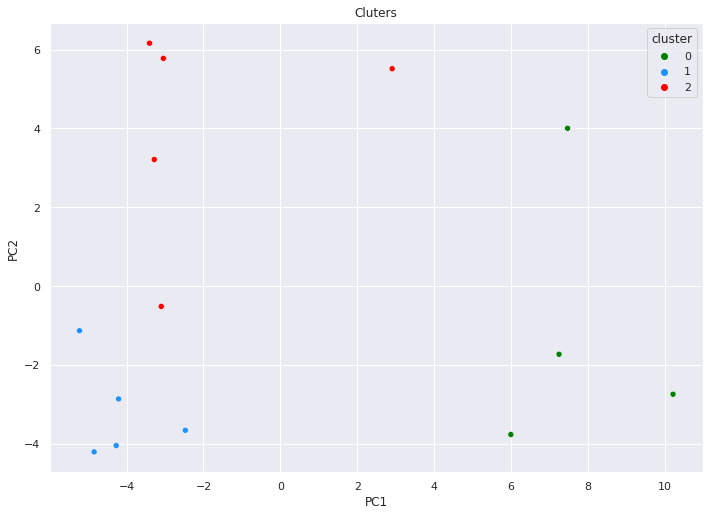

In [72]:
# Visualize the clusters using PCA and seaborn
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(corpus_embeddings)

df = pd.DataFrame(pca_embeddings, columns=['PC1', 'PC2'])
df['cluster'] = cluster_assignment
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df, palette=['green','dodgerblue','red']).set(title='Cluters')